# 20 years of S & P 500 daily price
### statistical analysis of price by day of week from Monday to Friday
### data source from Yahoo 1998-01-02 to 2017-12-29

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [279]:
rawdata = pd.read_csv('sp500daily.csv')

In [280]:
rawdata.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-01-02,970.429993,975.039978,965.729980,975.039978,975.039978,366730000
1,1998-01-05,975.039978,982.630005,969.000000,977.070007,977.070007,628070000
2,1998-01-06,977.070007,977.070007,962.679993,966.580017,966.580017,618360000
3,1998-01-07,966.580017,966.580017,952.669983,964.000000,964.000000,667390000
4,1998-01-08,964.000000,964.000000,955.039978,956.049988,956.049988,652140000


In [281]:
rawdata.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
5027,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000
5028,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000
5029,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000
5030,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000
5031,2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000


In [291]:
# find out day of week by the 'Date' in the rawdata
def date_to_weekday(Date):
    # date format: string('xxxx-m-dd') to weekday index
    weekday = []
    for i in range(len(Date)):
        date = Date[i]
        temp = [int(date.split('-')[0]), int(date.split('-')[1]), int(date.split('-')[2])]
        weekday.append(datetime.datetime(temp[0], temp[1], temp[2]).weekday())
    return np.array(weekday) # 0 to 6: Monday to Sunday

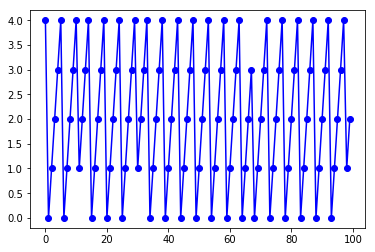

In [283]:
# check out some data to see if the above function works in converting the string file to weekday
today = rawdata['Date']
days_of_week = date_to_weekday(today)
plt.plot(days_of_week[:100], 'bo', linestyle='-')
plt.show()

In [284]:
# grab daily Close price
price_daily_close = rawdata['Close']

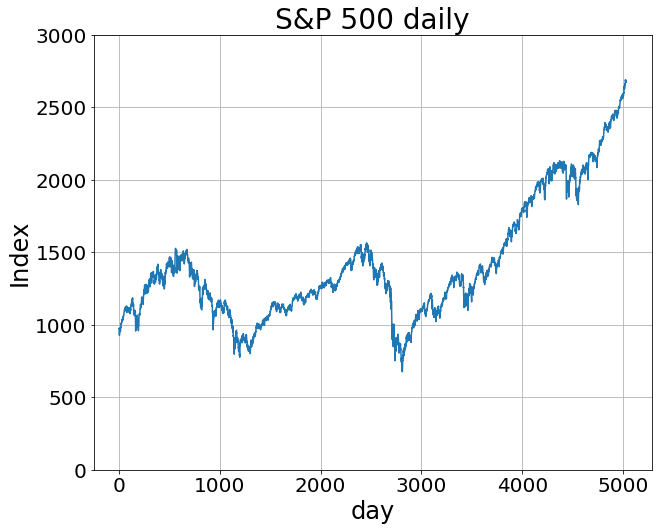

In [285]:
# plot out the price in twenty years (x axis for simply index from 0 to len(data))
fig = plt.figure(figsize=(10, 8))

plt.plot(price_daily_close)
plt.title('S&P 500 daily', fontsize=28)
plt.xlabel('day', fontsize=24)
plt.ylabel('Index', fontsize=24)
plt.tick_params(labelsize=20)
plt.grid(True)
plt.yticks(np.linspace(0, 3000, 7))
plt.show()

In [286]:
# load days_of_week and price data into pd.DataFrame data
x = np.array([days_of_week, rawdata['Close']]).T
data = pd.DataFrame(x)
data.columns=['day_of_week', 'price']

In [287]:
# check out head and tail to make sure data is right
# randomly pick a few examples and verified the robustness
data.head(10)

,day_of_week,price
0,4.0,975.039978
1,0.0,977.070007
2,1.0,966.580017
3,2.0,964.000000
4,3.0,956.049988
5,4.0,927.690002
6,0.0,939.210022
7,1.0,952.119995
8,2.0,957.940002
9,3.0,950.729980


In [288]:
data.tail(10)

,day_of_week,price
5022,4.0,2675.810059
5023,0.0,2690.159912
5024,1.0,2681.469971
5025,2.0,2679.250000
5026,3.0,2684.570068
5027,4.0,2683.340088
5028,1.0,2680.500000
5029,2.0,2682.620117
5030,3.0,2687.540039
5031,4.0,2673.610107


In [289]:
# calculate the mean price based on the day_of_week value with pandas mask
price_day_of_week = list()
for i in range(5):
    mask = (data['day_of_week'] == i)
    price_day_of_week.append(np.mean(data['price'][mask]))
print(price_day_of_week)

[1411.0072777185185, 1411.8599707196897, 1413.2230160299519, 1413.4173662159762, 1413.6241328391263]


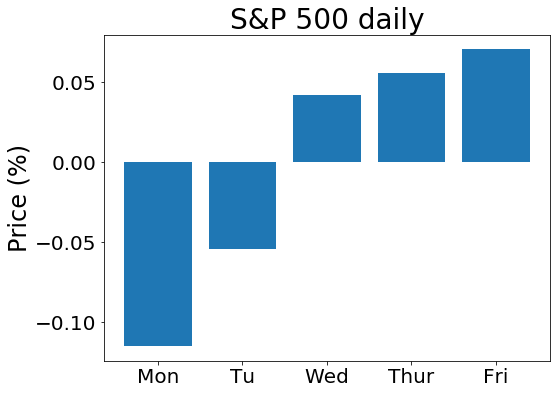

In [292]:
# plot out the relative price in % from Monday to Friday
weekday_index = [0, 1, 2, 3, 4]
weekdays = ['Mon', 'Tu', 'Wed', 'Thur', 'Fri']
fig = plt.figure(figsize=(8, 6))

plt.bar(weekday_index, (price_day_of_week - np.mean(price_day_of_week))/price_day_of_week*100)
plt.title('S&P 500 daily', fontsize=28)
# plt.xlabel('day', fontsize=24)
plt.ylabel('Price (%)', fontsize=24)
plt.xticks(weekday_index, weekdays)
plt.tick_params(labelsize=20)
plt.show()

# Therefore, Monday will be the best day for the monday averaging of S & P 500 